In [111]:
! git clone https://github.com/LindaMjw/project_chd

fatal: destination path 'project_chd' already exists and is not an empty directory.


In [112]:
df_test = pd.read_csv('/content/project_chd/fhs_test.csv')
df_test = df_test.dropna()

'Education' is categorical variable which is hard to choose one default value to replace Nan. And the whole dataset contains 3180 observations. Having 85 missing values only occupied 2.67% of the whole dataset, so we decide to clean those Nans.

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/project_chd/fhs_train.csv')  # Replace 'your_data.csv' with your dataset filename

# Handling missing values
# Identify variables with missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0           0
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64


In [114]:
df.describe()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3180.000000,3180.000000,3180.000000,3095.000000,3180.000000,3156.000000,3143.000000,3180.000000,3180.000000,3180.000000,3141.000000,3180.000000,3180.000000,3165.000000,3180.000000,2895.000000,3180.000000
mean,2129.740881,0.433019,49.633962,1.957027,0.490881,8.970532,0.029590,0.006604,0.321069,0.026101,236.600764,132.784748,83.117767,25.888117,75.942138,81.833506,0.153145
std,1231.779357,0.495571,8.557596,1.011135,0.499995,12.013704,0.169479,0.081008,0.466961,0.159460,44.847411,22.433267,12.009212,4.130475,12.050504,23.625357,0.360184
min,1.000000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,1062.750000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.100000,68.000000,71.000000,0.000000
50%,2137.500000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,129.000000,82.000000,25.490000,75.000000,78.000000,0.000000
75%,3209.250000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.125000,90.000000,28.140000,83.000000,87.000000,0.000000
max,4240.000000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,140.000000,394.000000,1.000000


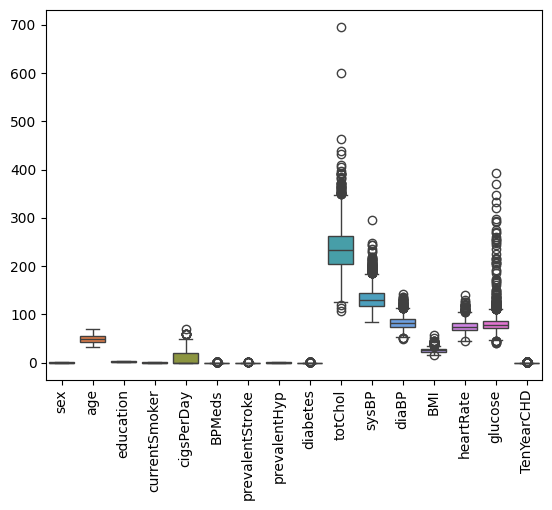

In [115]:
df= df.iloc[:, 1:]
sns.boxplot(data=df)
plt.xticks(rotation=90) #rotate the x-axis label
plt.show()

In [116]:
df = df.dropna()

In [117]:
df['totChol_arch'] = np.arcsinh(df['totChol'])
df['glucose_arch'] = np.arcsinh(df['glucose'])
df['heartRate_arch'] = np.arcsinh(df['heartRate'])
df['BMI_arch'] = np.arcsinh(df['BMI'])
df['diaBP_arch'] = np.arcsinh(df['diaBP'])
df['sysBP_arch'] = np.arcsinh(df['sysBP'])

df_test['totChol_arch'] = np.arcsinh(df_test['totChol'])
df_test['glucose_arch'] = np.arcsinh(df_test['glucose'])
df_test['heartRate_arch'] = np.arcsinh(df_test['heartRate'])
df_test['BMI_arch'] = np.arcsinh(df_test['BMI'])
df_test['diaBP_arch'] = np.arcsinh(df_test['diaBP'])
df_test['sysBP_arch'] = np.arcsinh(df_test['sysBP'])


<ipython-input-117-dd2792b8ca5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['totChol_arch'] = np.arcsinh(df['totChol'])
<ipython-input-117-dd2792b8ca5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['glucose_arch'] = np.arcsinh(df['glucose'])
<ipython-input-117-dd2792b8ca5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

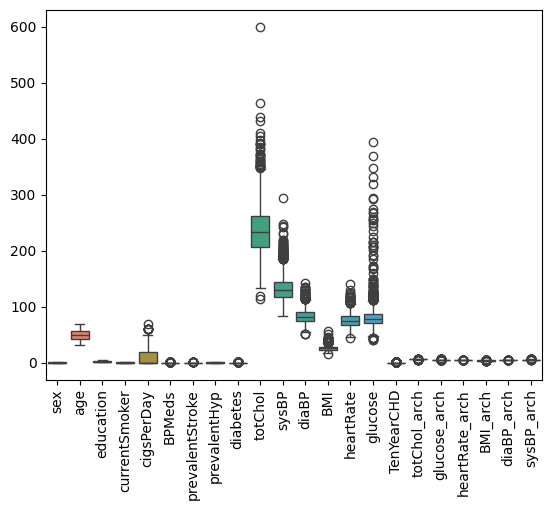

In [118]:
sns.boxplot(data=df)
plt.xticks(rotation=90) #rotate the x-axis label
plt.show()

In [119]:
# Define the list of columns you want to check for outliers
columns_to_check = ['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
                    'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
                    'diaBP', 'BMI', 'heartRate', 'glucose']

# Initialize df_filtered with the original dataframe
df_filtered = df.copy()

# Loop over each column to check for outliers
for col in columns_to_check:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

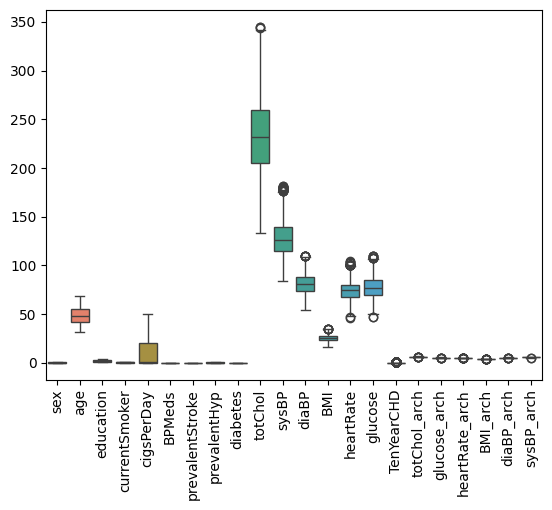

In [120]:
sns.boxplot(data=df_filtered)
plt.xticks(rotation=90) #rotate the x-axis label
plt.show()

In [121]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Selecting features and target variable for training and testing
X_train = df.drop(columns=['TenYearCHD'])  # Features for training
y_train = df['TenYearCHD']  # Target variable for training

X_test = df_test.drop(columns=['TenYearCHD'])  # Features for testing
y_test = df_test['TenYearCHD']  # Target variable for testing

# Loop through each feature variable and perform linear regression
for column in X_train.columns:
    # Extract single feature for training and testing
    x_train_feature = X_train[[column]]
    x_test_feature = X_test[[column]]

    # Initialize and fit the linear regression model
    reg = linear_model.LinearRegression().fit(x_train_feature,y_train)

    # Make predictions
    y_pred = reg.predict(x_test_feature)

    # Calculate R-squared
    r_sqr = reg.score(x_test_feature, y_test)

    # Calculate MSE
    mse = np.sqrt( np.mean( (y_test - y_pred)**2 ))

    # Print results
    print(f"Variable: {column}")
    print(f"R-squared: {r_sqr}")
    print(f"MSE: {mse}")
    print("\n")

Variable: sex
R-squared: 0.002209348517005716
MSE: 0.35222879498250875


Variable: age
R-squared: 0.05512448742612874
MSE: 0.3427618187962587


Variable: education
R-squared: 0.005143768877070909
MSE: 0.3517104756390516


Variable: currentSmoker
R-squared: 0.00015614707362332503
MSE: 0.3525910077434714


Variable: cigsPerDay
R-squared: 0.0025064176998389476
MSE: 0.35217635707403394


Variable: BPMeds
R-squared: 0.003574703920593336
MSE: 0.3519877213064948


Variable: prevalentStroke
R-squared: 0.00298468322208556
MSE: 0.3520919184336285


Variable: prevalentHyp
R-squared: 0.04560862198397231
MSE: 0.344483476460585


Variable: diabetes
R-squared: 0.004021209529988301
MSE: 0.35190884830757996


Variable: totChol
R-squared: -0.008735715110808728
MSE: 0.35415537749679904


Variable: sysBP
R-squared: 0.061149410216704725
MSE: 0.34166727458833185


Variable: diaBP
R-squared: 0.030743225322515277
MSE: 0.34715591095102505


Variable: BMI
R-squared: 0.009601962516968432
MSE: 0.35092154054280067

Choose the variable that has greather than 0.01 r-square to make a Multiple Linear Regression.

In [122]:
features = ['age', 'prevalentHyp', 'sysBP', 'diaBP', 'glucose']
target = 'TenYearCHD'

x_train_feature = df[features]
x_test_feature = df_test[features]

# Initialize and fit the linear regression model
reg = linear_model.LinearRegression().fit(x_train_feature,y_train)

# Make predictions
y_pred = reg.predict(x_test_feature)

# Calculate R-squared
r_sqr = reg.score(x_test_feature, y_test)

# Calculate MSE
mse = np.sqrt( np.mean( (y_test - y_pred)**2 ))


print(f"R-squared: {r_sqr}")
print(f"MSE: {mse}")

R-squared: 0.08941417138703378
MSE: 0.3364849042846366


In [123]:
features = ['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'sysBP', 'diaBP', 'BMI', 'glucose']

target = 'TenYearCHD'

x_train_feature = df[features]
x_test_feature = df_test[features]

# Initialize and fit the linear regression model
reg = linear_model.LinearRegression().fit(x_train_feature,y_train)

# Make predictions
y_pred = reg.predict(x_test_feature)

# Calculate R-squared
r_sqr = reg.score(x_test_feature, y_test)

# Calculate MSE
mse = np.sqrt( np.mean( (y_test - y_pred)**2 ))


print(f"R-squared: {r_sqr}")
print(f"MSE: {mse}")

R-squared: 0.09810064823496312
MSE: 0.3348761199634174


In [124]:
features = [ 'age', 'education', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp',  'sysBP', 'diaBP', 'BMI', 'glucose']

target = 'TenYearCHD'

x_train_feature = df[features]
x_test_feature = df_test[features]

# Initialize and fit the linear regression model
reg = linear_model.LinearRegression().fit(x_train_feature,y_train)

# Make predictions
y_pred = reg.predict(x_test_feature)

# Calculate R-squared
r_sqr = reg.score(x_test_feature, y_test)

# Calculate MSE
mse = np.sqrt( np.mean( (y_test - y_pred)**2 ))


print(f"R-squared: {r_sqr}")
print(f"MSE: {mse}")

R-squared: 0.1017551662706192
MSE: 0.33419696820242595


In [127]:
features = ['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'sysBP', 'diaBP', 'BMI', 'glucose','sysBP_arch','glucose_arch','BMI_arch','diaBP_arch']

target = 'TenYearCHD'

x_train_feature = df[features]
x_test_feature = df_test[features]

# Initialize and fit the linear regression model
reg = linear_model.LinearRegression().fit(x_train_feature,y_train)

# Make predictions
y_pred = reg.predict(x_test_feature)

# Calculate R-squared
r_sqr = reg.score(x_test_feature, y_test)

# Calculate MSE
mse = np.sqrt( np.mean( (y_test - y_pred)**2 ))


print(f"R-squared: {r_sqr}")
print(f"MSE: {mse}")

R-squared: 0.10879410744523299
MSE: 0.3328849542682952
